 Logistic regression Classifier.

In [1]:
# Import necessary packages

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Load the dataset into a dataframe named df_data
Drop the name column. This column is not a feature required by the model.
Create a dataframe named X containing all the columns except the status.
Create a dataframe named y containing the status.

In [2]:
df_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
df_data = df_data.drop(['name'], axis=1)
X = df_data.drop(['status'], axis=1)
y = df_data['status']

3. Split the dataset into a training set and a test set


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


create the model:

Instantiate a Logistic Regression classifier with a lbfgs solver and penalty set to 'none'.
Fit the classifier to the data.
If the algorithm fails to converge, what change can you make to fix that?

In [4]:
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=100)
lr.fit(X_train, y_train)

c:\users\gaukharjavarova\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

5. Calculate Accuracy
Calculate and print the accuracy of the model on the test data.

In [5]:
lr_score = lr.score(X_test, y_test)
print('Accuracy of Logistic Regression without regularization: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression without regularization: 0.837


6. L2 Regularization
Train another model with L2 regularization and compare the accuracy of the new model to the previous one.

In [6]:
lr = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)

print('Accuracy of Logistic Regression with L2 regularization: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression with L2 regularization: 0.816


7. Choose the C parameter. 
Use a loop to test the effect of varying the C parameter from 0.05 to 1.5 in increments of 0.5. Plot a graph to show the accuracy on the test data versus the accuracy on the training data. Select an appropriate value for C and explain why that may be the best value.

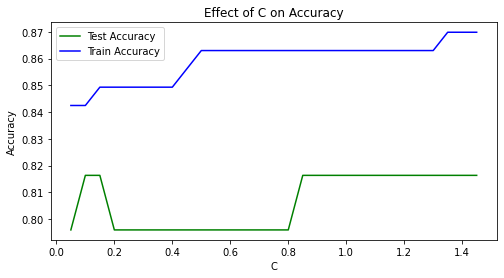

In [7]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

something was definitely wrong when I had 1000 iterations and max was 10000.  Test score showed a perfect line of accuracy. From this graph above the best value for C occur between 0.85 to 13